# 三. 线性模型

线性回归输出是一个连续值，因此适用于回归问题。回归问题在实际中很常见，如预测房屋价格、气温、销售额等连续值的问题。与回归问题不同，分类问题中模型的最终输出是一个离散值。我们所说的图像分类、垃圾邮件识别、疾病检测等输出为离散值的问题都属于分类问题的范畴。Logit和softmax回归则适用于分类问题。

由于线性回归和softmax回归都是单层神经网络，它们涉及的概念和技术同样适用于大多数的深度学习模型。我们首先以线性回归为例，介绍大多数深度学习模型的基本要素和表示方法。

## 1. 基本形式
给定由d个属性描述的示例$\mathbf{x}=(x_1;x_2;...;x_d)$，其中$x_i$是$x$在第i个属性上的取值，线性模型试图学得通过属性的线性组合来进行预测的函数，即
$$f(\mathbf{x})=\omega_1x_1 + \omega_2x_2+...+\omega_dx_d+b,$$
一般用向量形式写出
$$f(\mathbf{x})=\mathbf{\omega^Tx}+b,$$
其中$\mathbf{\omega}=(\omega_1;\omega_2;...;\omega_d)$. $\mathbf{\omega}$和b学得后，模型就确定了.

## 2.线性回归
给定数据集$D=\{(\mathbf{x_1},y_1),(\mathbf{x_2},y_2),...,(\mathbf{x_m},y_m)\}$，其中$\mathbf{x_i}=(x_{i1};x_{i2};...;x_{id}),y_i\in R$. 线性回归试图学得一个线性模型以尽可能准确地预测实数值输出标记. 我们试图学得
$$f(\mathbf{x_i})=\mathbf{x_i}+b,使得f(x_i)\simeq y_i,$$
这称为“多元线性回归”(multivariate linear regression).
可以利用最小二乘法对$\mathbf{\omega}$和b进行估计。假定$\mathbf{\hat \omega}=(\mathbf{\omega};b)$，相应地
$$
\mathbf{X} =
\begin{pmatrix}
    x_{11} & x_{12} & ... & x_{1d} & 1 \\
    x_{21} & x_{22} & ... & x_{2d} & 1 \\
    ... \\
    x_{m1} & x_{m2} & ... & x_{md} & 1
\end{pmatrix} = 
\begin{pmatrix}
    \mathbf{x_1^T} & 1 \\
    \mathbf{x_2^T} & 1 \\
    ... \\
    \mathbf{x_m^T} & 1
\end{pmatrix}, \mathbf{y}=
\begin{pmatrix}
y_1 \\
y_2 \\
... \\
y_m
\end{pmatrix}=(y_1;y_2;...;y_m)
$$

如何确定$\mathbf{\hat\omega}$呢？关键在于衡量$f(\mathbf{x})$和$y$的差别。均方误是回归任务中最常用的性能衡量指标，因此我们可以试图让均方误差最小化.
$$
\mathbf{\hat\omega^*}=\operatorname*{argmin}_{\mathbf{\hat\omega}}\mathbf{(y-X\hat\omega)^T(y-X\hat\omega)}.
$$
令$E_{\mathbf{\hat\omega}}=\mathbf{(y-X\hat\omega)^T(y-X\hat\omega)}$，对$\mathbf{\hat\omega}$求导可得
$$
\cfrac{\partial E_{\hat{w}}}{\partial \hat{w}}=2\mathbf{X}^T(\mathbf{X}\hat{w}-\mathbf{y}).
$$
令上式为0可得$\mathbf{\hat\omega}$最优解的封闭解。

当$\mathbf{X^t X}$为满秩矩阵或正定矩阵时，令$\cfrac{\partial E_{\hat{w}}}{\partial \hat{w}}=0$可得
$$
\mathbf{\hat\omega^*=(X^TX)^{-1}X^Ty},
$$
其中$\mathbf{(X^TX)^{-1}}$是$(X^TX)$的逆矩阵. 令$\mathbf{\hat x_i} = (\mathbf{x_i}; 1)$，则最终学得的线性回归模型为
$$
f(\mathrm{\hat x_i})=\mathbf{\hat x_i^T(X^TX)^{-1}X^Ty}.
$$

然而，现实任务中$\mathbf{X^t X}$往往不是满秩矩阵，而且随着数据量的增加，计算量呈现大幅增长。因此，往往求助于数值优化算法迭代求解。

In [1]:
%matplotlib inline
from sklearn.linear_model import LinearRegression
from IPython import display
import numpy as np
import torch
import random
import matplotlib.pyplot as plt

$y=\alpha + \beta X$

根据披萨的尺寸预测价格

In [2]:
X = np.array([[6], [8], [10], [14], [18]]) # X为训练数据的特征，即直径

In [3]:
y = np.array([7, 9, 13, 17.5, 18])  # 披萨价格

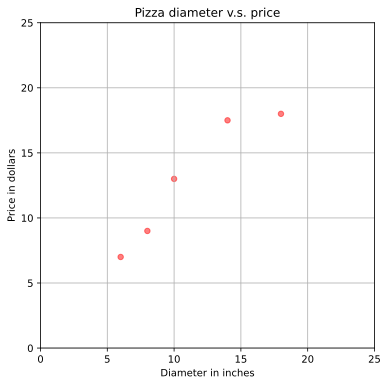

In [5]:
display.set_matplotlib_formats('svg')
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)
ax.set_title("Pizza diameter v.s. price")
ax.set_xlabel("Diameter in inches")
ax.set_ylabel("Price in dollars")
ax.scatter(X, y, s=30, alpha=0.5, c="red")
ax.axis([0, 25, 0, 25])
ax.grid(True)

## 3. 利用`sciki-learn`实现线性回归模型
可以使用`scikit-learn`的`LinearRegression`模块实现线性回归模型，其中有两个关键属性，`fit_intercept`指定是否保留截距，`normalize`指定是否使用标准化数据进行模型拟合。

In [6]:
model = LinearRegression(fit_intercept=True, normalize=True)  # 创建一个估计器实例

In [7]:
model.fit(X, y)  # 利用数据拟合模型

LinearRegression(normalize=True)

In [8]:
model.get_params()  # 模型设置的参数

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True}

In [9]:
print(f"拟合参数估计值: {model.coef_}\n截距项值:{model.intercept_}")

拟合参数估计值: [0.9762931]
截距项值:1.965517241379315


In [10]:
r2 = model.score(X, y)  # 模型的r2
print(f"R2: {r2: .4f}")

R2:  0.9100


预测值

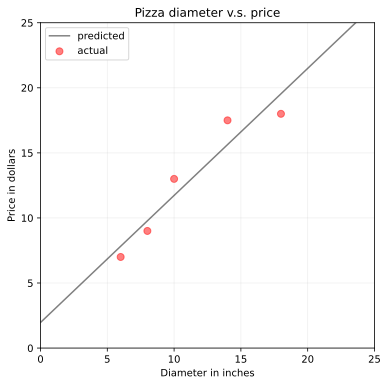

In [20]:
display.set_matplotlib_formats('svg')
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)
ax.set_title("Pizza diameter v.s. price")
ax.set_xlabel("Diameter in inches")
ax.set_ylabel("Price in dollars")
ax.plot(np.linspace(0, 25, num=100), model.predict(np.linspace(0, 25, num=100).reshape(-1, 1)), 
        'k-', alpha=0.5, label="predicted")
ax.scatter(X, y, s=50, alpha=0.5, c="red", label="actual")
ax.axis([0, 25, 0, 25])
ax.legend()
ax.grid(True, alpha=0.2)
plt.savefig("../pictures/4.1.svg")

In [11]:
test_pizza = np.array([[12], [18], [20], [21]])
predicted_price = model.predict(test_pizza)

In [11]:
predicted_price

array([13.68103448, 19.5387931 , 21.49137931, 22.46767241])

### 评价指标

- 回归平方和：$\mathrm{SS_{res}}=\sum_{i=1}^{n}(y_i - f(x_i))^2$

- 总平方和：$\mathrm{SS_{tot}=\sum_{i=1}^n(y_i-\bar{y})^2}$

- 决定系数：$R^2 = \mathrm{\frac{SS_{tot}-SS_{res}}{SS_{tot}}}$

In [13]:
mse = np.mean((model.predict(X) - y)**2)
print(f"Residual of MSE: {rse:.2f}")

Residual of MSE: 1.75


> 生成模拟数据

In [31]:
# 生成数据
true_w = torch.tensor([2, -3.4, 4.2])  # 权重+偏置
num_inputs = true_w.numel()  # 权重数量(true_w中元素个数)
num_examples = 1000  # 样本数量
features = torch.cat([torch.randn(num_examples, num_inputs - 1), torch.ones(num_examples).reshape(-1, 1)], axis=1 ) # 随机生成1000个特征(1000*2) 加上偏置
labels = linearModel(features, true_w) + torch.randn(num_examples).reshape(-1, 1) * 0.01  # 将随机生成的特征输入linearModel，然后加入随机项（表示偏差）

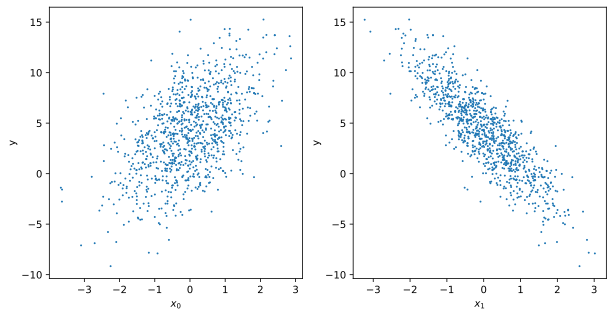

In [33]:
display.set_matplotlib_formats('svg')
plt.rcParams['figure.figsize'] = (8, 3)
fig = plt.figure(figsize=(10,5))
# y随第1个特征x_0的散点图
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_xlabel("$x_0$")
ax1.set_ylabel("y")
ax1.scatter(features[:, 0].numpy(), labels.numpy(), s=1)
# y随第2个特征x_1的散点图
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_xlabel("$x_1$")
ax2.set_ylabel("y")
ax2.scatter(features[:, 1].numpy(), labels.numpy(), s=1);

- 模型

In [99]:
def linearModel(X: torch.tensor, w: torch.tensor)-> torch.tensor:
    return X@w.reshape(-1, 1)

- 损失函数

In [110]:
def meanSquaredLoss(X: torch.tensor, y: torch.tensor, w: torch.tensor) -> torch.tensor:
    """
    y: 标签
    """
    hat_y = X @ w.reshape(-1, 1)
    sLoss = torch.dot(hat_y.reshape(-1) - y.reshape(-1), hat_y.reshape(-1) - y.reshape(-1))
    return sLoss.mean()

- 梯度

In [111]:
def grad_mse_w(X, y, w):
    return 2 * (X.t()@(X@w.reshape(-1, 1) - y.reshape(-1, 1)))

In [112]:
meanSquaredLoss(features, labels, true_w)

tensor(0.0975)

## 4. 基于梯度下降实现多元线性回归

- 输入: 特征`X`, 标签`y`, 迭代次数`n`, 学习率$\eta$
- 输出: 最优参数$w^*$，训练模型$f(x, w^*)$
- 算法过程:
    - 初始化参数值w, 当前训练次数i=0
    - 如果`i <= n`, 执行以下循环；否则，转至下一步
        - 更新参数值$w := w - \eta\mathbf{X}^T(\mathbf{X}\hat{w}-\mathbf{y})$
        - 更新训练次数$i := i+1$
    - 令$w^*=w, f(x, w^*)=x^Tw^*$, 算法结束

In [146]:
# 初始化参数
w = torch.randn(num_inputs, 1) * 0.01
for i in range(100):
    w -= 0.0001 * grad_mse_w(features, labels, w)
    if (i+1) % 10 == 0:
        mse = meanSquaredLoss(features, labels, w)
        print(f"{i+1}: {mse:.4f}")
        
print(w)

10: 383.5476
20: 4.5860
30: 0.1505
40: 0.0981
50: 0.0975
60: 0.0975
70: 0.0975
80: 0.0975
90: 0.0975
100: 0.0975
tensor([[ 2.0002],
        [-3.4001],
        [ 4.2002]])


## 5. 基于小批量随机梯度下降实现多元线性回归

在求数值解的优化算法中，小批量随机梯度下降(`mini-batch stochastic gradient descent`)在深度学习中被广泛使用。
它的算法很简单:
- 先选取一组模型参数的初始值，如随机选取;
- 接下来对参数进行多次迭代，使每次迭代都可能降低损失函数的值。

> **批量梯度下降法**和**随机梯度下降**可以看作是**小批量随机梯度下降法**的特殊形式，批量梯度下降法使用所有的样本更新参数，随机梯度下降使用1个样本更新参数，小批量随机梯度下降法选择1个小样本更新参数

In [28]:
# 随机选取batch_size数量的数据，生成器
def sampleData(batch_size, features, labels):
    """
    随机打乱样本次序，然后依次取出batch_size的(features, labels)作为训练集
    """
    num_examples = len(features)
    indices = list(range(num_examples))
    # 随机打乱索引次序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = torch.tensor(indices[i: min(i + batch_size, num_examples)])
        yield features[j], labels[j]  # 没调用一次函数，生成一个批次样本

- 自己构建导数

In [164]:
# 初始化参数
w = torch.randn(num_inputs, 1) * 0.1
lr = 0.005  # Learning rate
num_epochs = 100  # 一共训练次数
batch_size = 20  # 一批包含的样本数量

for epoch in range(num_epochs):
    for X, y in sampleData(batch_size, features, labels):
        w -= lr * grad_mse_w(X, y, w) / batch_size
    
    if (epoch + 1) % 10 == 0:
        mse = meanSquaredLoss(features, labels, w)
        print(f"{epoch + 1}: {mse:.4f}")

print(w)

10: 1.5070
20: 0.0975
30: 0.0975
40: 0.0975
50: 0.0975
60: 0.0975
70: 0.0975
80: 0.0975
90: 0.0975
100: 0.0975
tensor([[ 2.0001],
        [-3.4001],
        [ 4.2002]])


> 当`batch_size=1`时，即为随机梯度下降

In [166]:
# 初始化参数
w = torch.randn(num_inputs, 1) * 0.1
lr = 0.005  # Learning rate
num_epochs = 100  # 一共训练次数
batch_size = 1  # 一批包含的样本数量

for epoch in range(num_epochs):
    for X, y in sampleData(batch_size, features, labels):
        w -= lr * grad_mse_w(X, y, w) / batch_size
    
    if (epoch + 1) % 10 == 0:
        mse = meanSquaredLoss(features, labels, w)
        print(f"{epoch + 1}: {mse:.4f}")

print(w)

10: 0.0981
20: 0.0990
30: 0.0976
40: 0.1018
50: 0.0982
60: 0.0985
70: 0.0977
80: 0.0980
90: 0.0998
100: 0.0977
tensor([[ 2.0006],
        [-3.4002],
        [ 4.1999]])


- `auto_grad`求导

In [165]:
# 初始化参数
w = torch.randn(num_inputs, 1) * 0.01
w.requires_grad_(True)
# 上述4行可写成
# w = torch.randn(size=(num_inputs, 1), requires_grad=True) * 0.01

# 设置训练参数
lr = 0.01  # Learning rate
num_epochs = 100  # 一共训练次数
batch_size = 20  # 一批包含的样本数量

for epoch in range(num_epochs):
    for X, y in sampleData(batch_size, features, labels):
        loss = meanSquaredLoss(X, y, w)
        loss.backward()  # 计算损失函数在 w 上的梯度
        w.data.sub_(lr * w.grad.data / batch_size)  # 原地操作，结果等价于 param -= lr * param.grad / batch_size
        w.grad.data.zero_()  # 需将梯度重置为0，否则会被累加，影响迭代结果
    
    if (epoch + 1) % 10 == 0:
        with torch.no_grad():  # 不计算梯度，加速损失函数的运算
            train_l = meanSquaredLoss(features, labels, w)  # 最近一次的损失函数值
            est_w = w.detach().data.reshape(-1).numpy()  # detach得到一个有着和原tensor相同数据的tensor
            print(f'epoch {epoch + 1}, mean of squared loss: {train_l.numpy():.4f}')

print(w.detach())

epoch 10, mean of squared loss: 0.0976
epoch 20, mean of squared loss: 0.0975
epoch 30, mean of squared loss: 0.0975
epoch 40, mean of squared loss: 0.0975
epoch 50, mean of squared loss: 0.0975
epoch 60, mean of squared loss: 0.0975
epoch 70, mean of squared loss: 0.0975
epoch 80, mean of squared loss: 0.0975
epoch 90, mean of squared loss: 0.0975
epoch 100, mean of squared loss: 0.0975
tensor([[ 2.0001],
        [-3.4001],
        [ 4.2003]])


## 5. 利用`torch.nn.Module`实现

### 准备数据

In [167]:
from torch.utils.data import TensorDataset, DataLoader

In [168]:
def synthetic_data(w, b, num_examples):
    X = torch.randn(size=(num_examples, len(w)))
    y = (X @ w).reshape(-1, 1)  # torch.matmul(X, w).reshape(-1, 1)
    y += torch.randn(size=y.size()) * 0.01
    return X, y

In [169]:
true_w = torch.Tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

利用`TensorDataset`和`DataLoader`构建小批量数据加载器， 等价于`sampleData`过程

In [170]:
batch_size = 10  # 构建10个批次的训练集
dataset = TensorDataset(features, labels)
data_iter = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)

### 创建模型

```python
class LinearModel(torch.nn.Module):
    def __init__(self, ndim):
        super(LinearModel, self).__init__()
        self.ndim = ndim
        self.w = torch.nn.Parameter(torch.randn(self.ndim, 1))  # params
        self.b = torch.nn.Parameter(torch.tensor(0, dtype=torch.float16))  # bias

    def forward(self, X):
        return X@self.w + self.b
```

In [171]:
class LinearRegressionModel(torch.nn.Module): 
    def __init__(self):
        # 首先找到LinearModel的父类torch.nn.Module，然后把类LinearModel的对象转换为类torch.nn.Module的对象, 
        # 即执行父类torch.nn.Module的初始化__init__()
        super(LinearRegressionModel, self).__init__() 
        self.layer1 = torch.nn.Linear(2, 1, bias=True)
        
    def forward(self, x): 
        y_pred = self.layer1(x)
        return y_pred 
    
net = LinearRegressionModel()

初始化权重和偏差

In [172]:
net.layer1.weight.data = torch.Tensor(np.random.normal(loc=0, scale=0.01, size=(1,2)))
net.layer1.bias.data = torch.Tensor([0])

定义损失函数

In [173]:
loss = torch.nn.MSELoss(reduction = "sum")  # reduction制定了应用于output的方法：'none' | 'mean' | 'sum'

In [174]:
trainer = torch.optim.SGD(net.parameters(), lr=0.03)  # 随机梯度下降算法

In [175]:
num_epochs = 10
for epoch in range(num_epochs): 
    for X, y in data_iter:
        l = loss(net.forward(X), y)
        trainer.zero_grad()  # 梯度归0
        l.backward()  # 计算梯度
        trainer.step()  # 执行一步随机梯度下降算法
    
    with torch.no_grad():  # 不计算梯度，加速损失函数的运算
        l_epoch = loss(net(features), labels) 
        print('epoch {}, loss {}'.format(epoch+1, l_epoch)) 

epoch 1, loss 0.11530986428260803
epoch 2, loss 0.10756827145814896
epoch 3, loss 0.1221570074558258
epoch 4, loss 0.1283676028251648
epoch 5, loss 0.1431499868631363
epoch 6, loss 0.11461175233125687
epoch 7, loss 0.11217442154884338
epoch 8, loss 0.14598146080970764
epoch 9, loss 0.11417727917432785
epoch 10, loss 0.11670969426631927


In [176]:
w = list(net.parameters())[0][0]
print('Error in estimating w', true_w.reshape(w.shape) - w)
b = list(net.parameters())[1][0]
print('Error in estimating b', true_b - b)

Error in estimating w tensor([ 0.0027, -0.0021], grad_fn=<SubBackward0>)
Error in estimating b tensor(4.1991, grad_fn=<RsubBackward1>)


## 练习
请基于`torch`实现多项式回归。
$$
y=\alpha + \sum_{j=1}^{j=p}\beta_j x^j
$$

In [16]:
X = 0.3 * np.arange(50).reshape(-1, 1)
y = np.sin(X) + np.random.randn(len(X), 1).reshape(-1, 1) * 0.01

In [8]:
def polyRegres(X, y, p=2):
    c_X = np.concatenate([X**i for i in range(1, p+1)], axis=1)
    plm = LinearRegression(fit_intercept=True, normalize=True)  # 创建一个估计器实例
    plm.fit(c_X, y)
    return plm, c_X

In [47]:
plm, c_X = polyRegres(X, y, p=2)

In [48]:
plm.get_params()  # 模型设置的参数

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True}

In [49]:
print(f"拟合参数估计值: {plm.coef_}\n截距项值:{plm.intercept_}")

拟合参数估计值: [[ 2.95615672 -0.08202292]]
截距项值:[-8.39765458]


In [42]:
r2 = plm.score(c_X, y)  # 模型的r2
print(f"R2: {r2: .4f}")

R2:  0.9816


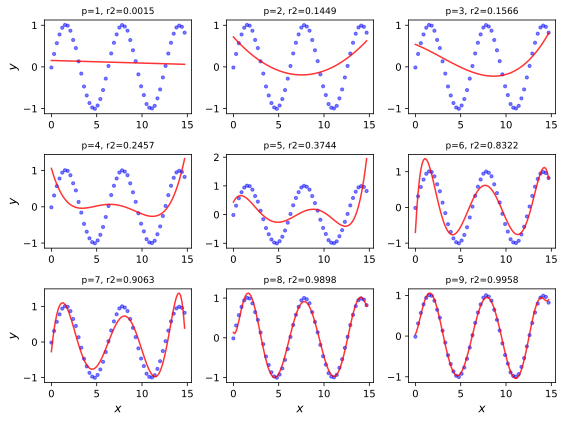

In [23]:
display.set_matplotlib_formats("svg")
fig = plt.figure(figsize=(8, 6))
for i in range(1, 10):
    p = i
    plm, c_X = polyRegres(X, y, p=p)
    ax = fig.add_subplot(3, 3, i)
    if i >= 7:
        ax.set_xlabel('$x$', size=12)
    if i == 1 or i == 4 or i == 7:
        ax.set_ylabel('$y$', size=12)
        
    ax.set_title(f'p={p}, r2={plm.score(c_X, y):.4f}', size=9)
    ax.scatter(X, y, c='blue', s=10, alpha=0.5)
    x_array = np.linspace(np.min(X), np.max(X), num=100).reshape(-1, 1)
    c_x_array = np.concatenate([x_array**j for j in range(1, p+1)], axis=1)
    ax.plot(x_array, plm.predict(c_x_array), 'r-', lw=1.5, alpha=0.8)
fig.tight_layout()

In [33]:
test_pizza = np.array([[12], [18], [20], [21]])
test_pizza = np.concatenate([test_pizza**i for i in range(1, p+1)], axis=1)
predicted_price = plm.predict(test_pizza)

In [34]:
predicted_price

array([[15.43092105],
       [17.96898496],
       [14.99953008],
       [12.50149789]])